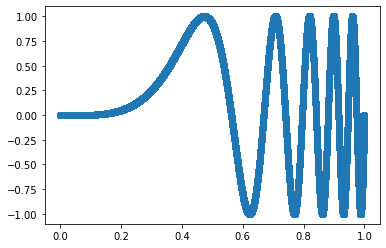

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

X = np.arange(0,1,0.000001)
y = np.sin(10*np.pi*np.power(X,4))
plt.scatter(X,y,norm=0.1)

In [ ]:
import random

n = 10000
index = random.sample(range(len(X)), n)
X_train = X[index]
y_train = y[index]

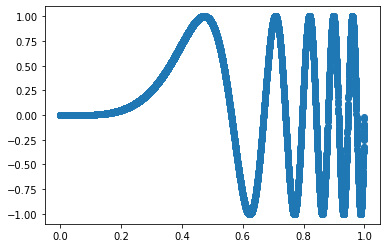

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
class Mydata(Dataset):
    def __init__(self, X, y):
        self.x = X
        self.y = y

    def __getitem__(self, idx):
        assert idx < len(self.x)
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

dataset = Mydata(X_train, y_train)
dataloader = DataLoader(dataset, batch_size = 256, shuffle=True)

In [ ]:
import torch
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1, 512)
        self.linear2 = nn.Linear(512, 256)
        self.linear3 = nn.Linear(256, 1)
        self.relu = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(512)
        self.bn2 = nn.BatchNorm1d(256)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.bn1(x)
        
        x = self.linear2(x)
        x = self.relu(x)
        x = self.bn2(x)
        x = self.linear3(x)

        return x

model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(), weight_decay=0.00001, lr=0.0001, momentum=0.9)
criterion = nn.MSELoss()

Epoch: 1 Average loss: 0.3605183007625433
Epoch: 2 Average loss: 0.22787370972144297
Epoch: 3 Average loss: 0.19895929212753588
Epoch: 4 Average loss: 0.17470866670975319
Epoch: 5 Average loss: 0.16381415533713806
Epoch: 6 Average loss: 0.1538569422868582
Epoch: 7 Average loss: 0.12456984149339871
Epoch: 8 Average loss: 0.10922842071606563
Epoch: 9 Average loss: 0.11044616500536601
Epoch: 10 Average loss: 0.09039070705572765
Epoch: 11 Average loss: 0.08312172824755693
Epoch: 12 Average loss: 0.07337967869945061
Epoch: 13 Average loss: 0.08556382740155244
Epoch: 14 Average loss: 0.06456825213554578
Epoch: 15 Average loss: 0.053916590431561835
Epoch: 16 Average loss: 0.08717393521697094
Epoch: 17 Average loss: 0.07723694476179588
Epoch: 18 Average loss: 0.07671864283008453
Epoch: 19 Average loss: 0.08536584035326274
Epoch: 20 Average loss: 0.08211756249268849
Epoch: 21 Average loss: 0.07770853174420503
Epoch: 22 Average loss: 0.05291517709310238
Epoch: 23 Average loss: 0.0318969247910456

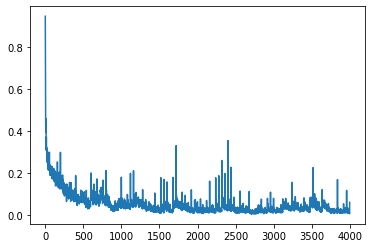

In [ ]:
def train(model):

  epochs = 100
  loss_list=[]

  for epoch in range(epochs):
      for i, data in enumerate(dataloader):
          inputs, labels = data
          inputs = inputs.unsqueeze(1).float()
          labels = labels.unsqueeze(1).float()
          inputs = inputs.to(device)
          labels = labels.to(device)

          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          loss_list.append(float(loss))
        
      print('Epoch:',epoch+1,'Average loss:',np.mean(loss_list[epoch*i:(epoch+1)*i]))
    
  plt.plot(range(len(loss_list)),loss_list)

  return model

model = train(model)

In [ ]:
def create_loader(m):
  X1 = np.arange(0,1,0.000001)
  y1 = np.sin(10*np.pi*np.power(X1,4))
  index = random.sample(range(len(X1)), m)
  X_test1 = X1[index]
  y_test1 = y1[index]

  X2 = np.arange(0,1.5,0.000001)
  y2 = np.sin(10*np.pi*np.power(X2,4))
  index = random.sample(range(len(X2)), m)
  X_test2 = X2[index]
  y_test2 = y2[index]

  test_dataset1 = Mydata(X_test1, y_test1)
  test_dataset2 = Mydata(X_test2, y_test2)
  testloader1 = DataLoader(test_dataset1, batch_size = 1000, shuffle=True)
  testloader2 = DataLoader(test_dataset2, batch_size = 1000, shuffle=True)

  return testloader1, testloader2

testloader1, testloader2 = create_loader(1000)

In [ ]:
def test(model, testloader):
  with torch.no_grad():
      for data in testloader:
        inputs, labels = data
        inputs = inputs.unsqueeze(1).float()
        inputs = inputs.to(device)

        outputs = model(inputs)
        break
  return inputs,outputs

inputs1,outputs1 = test(model, testloader1)
inputs2,outputs2 = test(model, testloader2)

In [ ]:
def eval(inputs1,outputs1,inputs2,outputs2):
  f_in = np.max(np.array(abs(inputs1.cpu()-outputs1.cpu()).squeeze(1)))
  f_out = np.max(np.array(abs(inputs2.cpu()-outputs2.cpu()).squeeze(1)))
  return f_in, f_out

In [ ]:
f_in, f_out = eval(inputs1,outputs1,inputs2,outputs2)
f_in, f_out

(2.3124251, 2.4103222)

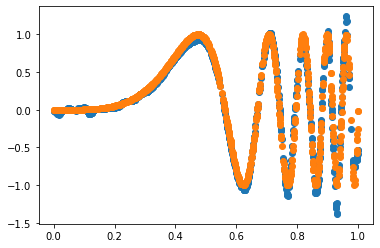

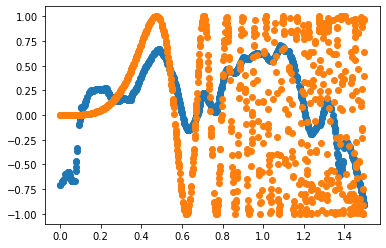

In [ ]:
plt.scatter(inputs1.cpu(),outputs1.cpu())
plt.scatter(inputs1.cpu(),np.sin(10*np.pi*np.power(inputs1.cpu(),4)))
plt.show()
plt.scatter(inputs2.cpu(),outputs2.cpu())
plt.scatter(inputs2.cpu(),np.sin(10*np.pi*np.power(inputs2.cpu(),4)))
plt.show()

(c)

In [ ]:
def train1(model,inputs,labels):

  epochs = 150
  loss_list=[]

  for epoch in range(epochs):
      inputs = torch.tensor(inputs).float()
      labels = torch.tensor(labels).float()
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      loss_list.append(float(loss))

  return model

In [ ]:
def test_train(n):
  
  X = np.arange(0,1,0.000001)
  y = np.sin(10*np.pi*np.power(X,4))
  f_in_list=[]
  f_out_list=[]
  for i in range(5):
    index = random.sample(range(len(X)), n)
    X_train = X[index].reshape(-1,1)
    y_train = y[index].reshape(-1,1)

    model = MLP().to(device)
    optimizer = torch.optim.SGD(model.parameters(), weight_decay=0.00001, lr=0.0001, momentum=0.9)
    criterion = nn.MSELoss()

    model = train1(model,X_train,y_train)

    testloader1, testloader2 = create_loader(1000)

    inputs1,outputs1 = test(model, testloader1)
    inputs2,outputs2 = test(model, testloader2)

    f_in, f_out = eval(inputs1,outputs1,inputs2,outputs2)

    f_in_list.append(f_in)
    f_out_list.append(f_out)

  f_in_mean = np.mean(f_in_list)
  f_in_sd = np.std(f_in_list)
  f_out_mean = np.mean(f_out_list)
  f_out_sd = np.std(f_out_list)

  return f_in_mean, f_in_sd, f_out_mean, f_out_sd

In [ ]:
n_list = np.logspace(1, 3, 20).astype(int)
f_in_mean_list=[]
f_out__mean_list=[]
f_in_sd_list=[]
f_out__sd_list=[]

for n in n_list:
  print('n:',n)
  f_in_mean, f_in_sd, f_out_mean, f_out_sd = test_train(n)

  f_in_mean_list.append(f_in_mean)
  f_out__mean_list.append(f_out_mean)
  f_in_sd_list.append(f_in_sd)
  f_out__sd_list.append(f_out_sd)

n: 10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


n: 12
n: 16
n: 20
n: 26
n: 33
n: 42
n: 54
n: 69
n: 88
n: 112
n: 143
n: 183
n: 233
n: 297
n: 379
n: 483
n: 615
n: 784
n: 1000


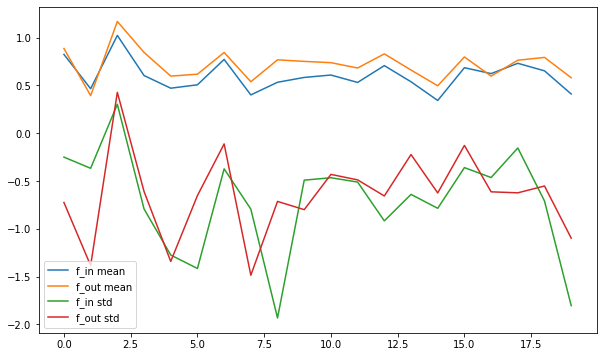

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(len(n_list)), np.log(f_in_mean_list),label='f_in mean')
plt.plot(range(len(n_list)), np.log(f_out__mean_list),label='f_out mean')
plt.plot(range(len(n_list)), np.log(f_in_sd_list),label='f_in std')
plt.plot(range(len(n_list)), np.log(f_out__sd_list),label='f_out std')
# plt.plot(n_list, np.log(f_in_mean_list),label='f_in mean')
# plt.plot(n_list, np.log(f_out__mean_list),label='f_out mean')
# plt.plot(n_list, np.log(f_in_sd_list),label='f_in std')
# plt.plot(n_list, np.log(f_out__sd_list),label='f_out std')
plt.legend()
# plt.xticks(range(len(n_list)),n_list)